### Lab PSI - C2

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
size = (100, 2)
data = np.random.uniform(-10, 10.0, size)

df = pd.DataFrame(data=data, columns = ['x1', 'x2'])
df

,x1,x2
0,0.976270,4.303787
1,2.055268,0.897664
2,-1.526904,2.917882
3,-1.248256,7.835460
4,9.273255,-2.331170
...,...,...
95,-2.035579,-5.803125
96,-6.276140,8.887448
97,4.791016,-0.190824
98,-5.451707,-4.912870


### Booth

In [2]:
from booth import booth

df['eval'] = df.apply(lambda x: booth(x['x1'], x['x2']), axis = 1)

In [3]:
df

,x1,x2,eval
0,0.976270,4.303787,0.121144
1,2.055268,0.897664,0.100818
2,-1.526904,2.917882,0.029744
3,-1.248256,7.835460,0.018112
4,9.273255,-2.331170,0.007605
...,...,...,...
95,-2.035579,-5.803125,0.001545
96,-6.276140,8.887448,0.010491
97,4.791016,-0.190824,0.038470
98,-5.451707,-4.912870,0.001076


##### Podstawowe statystyki bez skalowania

In [4]:
print("Minimum:                ", np.min(df['eval']))
print("Maksimum:               ", np.max(df['eval']))
print("Średnia:                ", np.mean(df['eval']))
print("Odchylenie standardowe: ", np.std(df['eval']))

Minimum:                 0.0005114663002214715
Maksimum:                0.6881932007607846
Średnia:                 0.02516436073893765
Odchylenie standardowe:  0.08080795506214328


##### Skalowanie liniowe

In [5]:
from linear_scaling import linear_scaling

linear = linear_scaling(df['eval'])
df['linearly scaled'] = linear

# list = [17.2, 30.1, 9.7, 11.9, 21.2, 15.2]
# test = np.array(list)
# linear_scaling(test)

In [6]:
df

,x1,x2,eval,linearly scaled
0,0.976270,4.303787,0.121144,0.026986
1,2.055268,0.897664,0.100818,0.026600
2,-1.526904,2.917882,0.029744,0.025251
3,-1.248256,7.835460,0.018112,0.025030
4,9.273255,-2.331170,0.007605,0.024831
...,...,...,...,...
95,-2.035579,-5.803125,0.001545,0.024716
96,-6.276140,8.887448,0.010491,0.024886
97,4.791016,-0.190824,0.038470,0.025417
98,-5.451707,-4.912870,0.001076,0.024707


##### Podstawowe statystyki po skalowaniu liniowym

In [7]:
print("Minimum:                ", np.min(df['linearly scaled']))
print("Maksimum:               ", np.max(df['linearly scaled']))
print("Średnia:                ", np.mean(df['linearly scaled']))
print("Odchylenie standardowe: ", np.std(df['linearly scaled']))

Minimum:                 0.024696489897999455
Maksimum:                0.03774648417802593
Średnia:                 0.02516432278535062
Odchylenie standardowe:  0.0015334758777166297


Wnioski:
1. Skalowanie liniowe zachowuje wartość średnią
2. Zdecydowanie zmniejsza wartość maksymalną, ale również zwiększa wartość minimalną
3. Całościowo wartości są zdecydowanie mniej "rozrzucone" niż w przypadku bez skalowania (ok. 5 krotny spadek wartości odchylenia standardowego)
4. Dla wartości poniżej średniej zostały zwiększone po skalowaniu, a powyżej niej zmniejszone.

##### Skalowanie logarytmiczne

In [8]:
from logarithm_scaling import logarithm_scaling

logarithm = logarithm_scaling(df['eval'])
df['logarithmy scaled'] = logarithm

In [9]:
df

,x1,x2,eval,linearly scaled,logarithmy scaled
0,0.976270,4.303787,0.121144,0.026986,2.606086
1,2.055268,0.897664,0.100818,0.026600,2.871054
2,-1.526904,2.917882,0.029744,0.025251,4.632132
3,-1.248256,7.835460,0.018112,0.025030,5.347765
4,9.273255,-2.331170,0.007605,0.024831,6.599712
...,...,...,...,...,...
95,-2.035579,-5.803125,0.001545,0.024716,8.899242
96,-6.276140,8.887448,0.010491,0.024886,6.135564
97,4.791016,-0.190824,0.038470,0.025417,4.260997
98,-5.451707,-4.912870,0.001076,0.024707,9.421356


##### Podstawowe statystyki po skalowaniu logarytmicznym

In [10]:
print("Minimum:                ", np.min(df['logarithmy scaled']))
print("Maksimum:               ", np.max(df['logarithmy scaled']))
print("Średnia:                ", np.mean(df['logarithmy scaled']))
print("Odchylenie standardowe: ", np.std(df['logarithmy scaled']))

Minimum:                 0.09999999999999998
Maksimum:                10.493958737208336
Średnia:                 7.047956518058984
Odchylenie standardowe:  2.1304511256715766


##### Wizualizacja

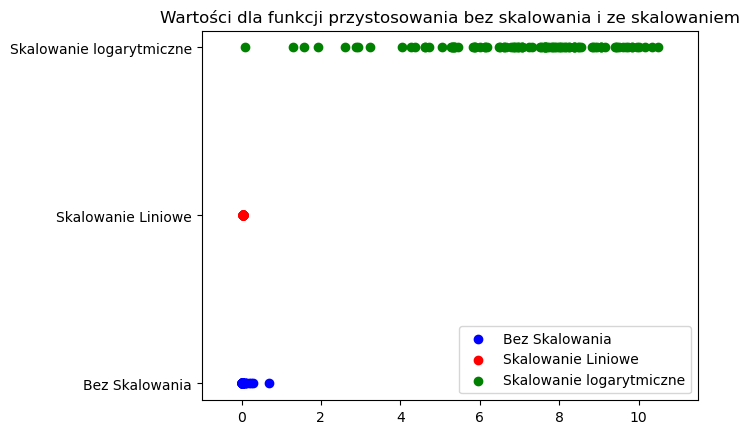

In [11]:
from plot_points import plot_points

plot_points(df['eval'], df['linearly scaled'], df['logarithmy scaled'], 'Bez Skalowania', 'Skalowanie Liniowe', 'Skalowanie logarytmiczne')

Wnioski:
1. Skalowanie logayrmiczne nie zachowuje wartości średniej, jak liniowe
2. Zdecydowanie zwiększa wartość maksymalną (kilkukrotnie), pozostawiając wartość minimalną bliską różnicy 'b' we wzorze skalowania a maksymalną wartością po logarytmowaniu
3. Całościowo wartości są zdecydowanie bardziej "rozrzucone" niż w przypadku skalowania liniowego i jeszcze bardziej w przypadku bez skalowania (ok. 30 krotny wzrost wartości odchylenia standardowego względem bez skalowania i prawie 1500 krotny względem skalowania liniowego).
4. Z powodu działania funkcji logarytm im mniejsza wartość na wejściu funckji przystosowania tym większa wartośći po skalowaniu logarytmicznym

### Sprawdzenie poprawności implementacji skalowania liniowego - (C_zwiel = 1.5):
eval(linear)_max = C_zwiel * eval_mean

In [12]:
np.mean(df['eval']) * 1.5

0.03774654110840647

In [13]:
np.max(df['linearly scaled'])

0.03774648417802593

### Rosenbrock

In [14]:
size = (100, 2)
data = np.random.uniform(-2.048, 2.048, size)

df = pd.DataFrame(data=data, columns = ['x1', 'x2'])
df

,x1,x2
0,-0.770884,0.804223
1,-0.500728,-1.312343
2,-1.946916,-1.772546
3,0.734793,-0.189658
4,0.149828,1.624766
...,...,...
95,-1.791128,-0.311164
96,-0.988430,1.429661
97,-1.911584,1.879993
98,-0.592409,-0.586929


In [15]:
from rosenbrock import rosenbrock

df['eval'] = df.apply(lambda x: rosenbrock(x['x1'], x['x2']), axis = 1)

df

,x1,x2,eval
0,-0.770884,0.804223,0.132549
1,-0.500728,-1.312343,0.004056
2,-1.946916,-1.772546,0.000322
3,0.734793,-0.189658,0.018762
4,0.149828,1.624766,0.003884
...,...,...,...
95,-1.791128,-0.311164,0.000802
96,-0.988430,1.429661,0.040909
97,-1.911584,1.879993,0.003094
98,-0.592409,-0.586929,0.011050


##### Podstawowe statystyki bez skalowania

In [16]:
print("Minimum:                ", np.min(df['eval']))
print("Maksimum:               ", np.max(df['eval']))
print("Średnia:                ", np.mean(df['eval']))
print("Odchylenie standardowe: ", np.std(df['eval']))

Minimum:                 0.0003222260497393553
Maksimum:                2.7407265741685194
Średnia:                 0.06063025354561511
Odchylenie standardowe:  0.2824500689890087


#### Skalowanie liniowe

In [17]:
linear = linear_scaling(df['eval'])
df['linearly scaled'] = linear

In [18]:
df

,x1,x2,eval,linearly scaled
0,-0.770884,0.804223,0.132549,0.061444
1,-0.500728,-1.312343,0.004056,0.059990
2,-1.946916,-1.772546,0.000322,0.059948
3,0.734793,-0.189658,0.018762,0.060157
4,0.149828,1.624766,0.003884,0.059988
...,...,...,...,...
95,-1.791128,-0.311164,0.000802,0.059954
96,-0.988430,1.429661,0.040909,0.060407
97,-1.911584,1.879993,0.003094,0.059979
98,-0.592409,-0.586929,0.011050,0.060069


##### Podstawowe statystyki po skalowaniu liniowym

In [19]:
print("Minimum:                ", np.min(df['linearly scaled']))
print("Maksimum:               ", np.max(df['linearly scaled']))
print("Średnia:                ", np.mean(df['linearly scaled']))
print("Odchylenie standardowe: ", np.std(df['linearly scaled']))

Minimum:                 0.059948074538479626
Maksimum:                0.09094534638481151
Średnia:                 0.06063023092320767
Odchylenie standardowe:  0.0031948502699894327


Wnioski:
1. Skalowanie liniowe zachowuje wartość średnią
2. Zdecydowanie zmniejsza wartość maksymalną, ale również zwiększa wartość minimalną
3. Całościowo wartości są zdecydowanie mniej "rozrzucone" niż w przypadku bez skalowania (ok. 90 krotny spadek wartości odchylenia standardowego)
4. Dla wartości poniżej średniej zostały zwiększone po skalowaniu, a powyżej niej zmniejszone.

##### Skalowanie logarytmiczne

In [20]:
logarithm = logarithm_scaling(df['eval'])
df['logarithmy scaled'] = logarithm

In [21]:
df

,x1,x2,eval,linearly scaled,logarithmy scaled
0,-0.770884,0.804223,0.132549,0.061444,4.469961
1,-0.500728,-1.312343,0.004056,0.059990,9.500422
2,-1.946916,-1.772546,0.000322,0.059948,13.154198
3,0.734793,-0.189658,0.018762,0.060157,7.290589
4,0.149828,1.624766,0.003884,0.059988,9.562790
...,...,...,...,...,...
95,-1.791128,-0.311164,0.000802,0.059954,11.838040
96,-0.988430,1.429661,0.040909,0.060407,6.166002
97,-1.911584,1.879993,0.003094,0.059979,9.891030
98,-0.592409,-0.586929,0.011050,0.060069,8.054359


In [22]:
print("Minimum:                ", np.min(df['logarithmy scaled']))
print("Maksimum:               ", np.max(df['logarithmy scaled']))
print("Średnia:                ", np.mean(df['logarithmy scaled']))
print("Odchylenie standardowe: ", np.std(df['logarithmy scaled']))

Minimum:                 0.10000000000000009
Maksimum:                13.154197655233071
Średnia:                 8.907147727429154
Odchylenie standardowe:  2.658989377677497


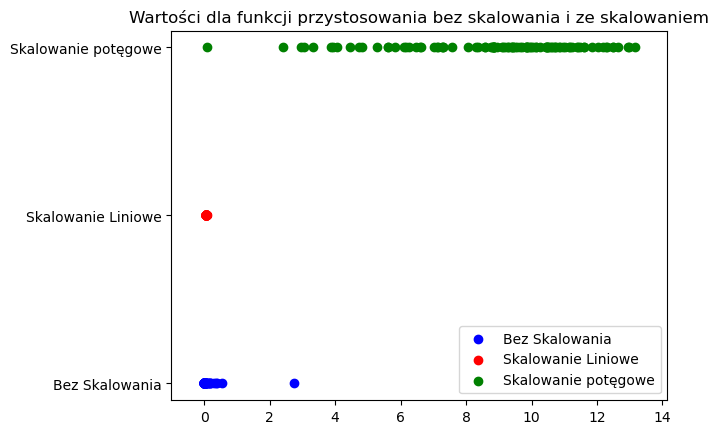

In [23]:
plot_points(df['eval'], df['linearly scaled'], df['logarithmy scaled'], 'Bez Skalowania', 'Skalowanie Liniowe', 'Skalowanie potęgowe')

Wnioski:
1. Skalowanie logayrmiczne nie zachowuje wartości średniej, jak liniowe
2. Zdecydowanie zwiększa wartość maksymalną (kilkukrotnie), pozostawiając wartość minimalną bliską różnicy 'b' we wzorze skalowania a maksymalną wartością po logarytmowaniu
3. Całościowo wartości są zdecydowanie bardziej "rozrzucone" niż w przypadku skalowania liniowego i jeszcze bardziej w przypadku bez skalowania (ok. 9 krotny wzrost wartości odchylenia standardowego względem bez skalowania i prawie 900 krotny względem skalowania liniowego).
4. Z powodu działania funkcji logarytm im mniejsza wartość na wejściu funckji przystosowania tym większa wartośći po skalowaniu logarytmicznym

### Liniowe skalowanie funkcja celu Rosenbrock VS Booth:
1. W przpadku Rosenbrock bardziej zmniejszyło wartość odchylenia standardowego (90 vs 5 krotnie)
2. W przypadku funkcji Booth wartości były rozłożone bliżej 0, znaczy się przedział ok. (0.025, 0.038) vs (0.060, 0.091) w funkcji Rosenbrocka*
3. Oby dwie funkcje "wytrącają" wartości mocno z wartości bliskich 0

*Choć należy zaznaczyć, że wyniki dla funkcji Rosenbrocka bez skalowania mają większe zakresy niż funkcji Booth (0.0003, 2.7407) vs (0.0005, 0.6881)

### Selekcja metodą "ruletki"

In [24]:
from roulette_wheel_selection import roulette_wheel_selection

size = (100, 2)
data = np.random.uniform(-10, 10.0, size)

df = pd.DataFrame(data=data, columns = ['x1', 'x2'])
df

,x1,x2
0,-1.974810,8.585828
1,-8.007701,8.906031
2,7.389771,-0.916752
3,-3.465982,-5.345117
4,2.289294,-9.338508
...,...,...
95,4.797678,7.961247
96,3.451646,0.578799
97,-3.911073,9.959245
98,-2.756219,-0.587021


##### Booth

##### Bez skalowania

In [25]:
df['eval'] = df.apply(lambda x: booth(x['x1'], x['x2']), axis = 1)

In [26]:
print("Minimum:                ", np.min(df['eval']))
print("Maksimum:               ", np.max(df['eval']))
print("Średnia:                ", np.mean(df['eval']))
print("Odchylenie standardowe: ", np.std(df['eval']))

Minimum:                 0.00045850254847764883
Maksimum:                0.36956663472245793
Średnia:                 0.012280371216419004
Odchylenie standardowe:  0.03940629327294233


In [27]:
df[['new x1', 'new x2']] = roulette_wheel_selection(df, 'eval')

In [28]:
df

,x1,x2,eval,new x1,new x2
0,-1.974810,8.585828,0.014854,9.019052,-5.331595
1,-8.007701,8.906031,0.006472,0.499409,5.011900
2,7.389771,-0.916752,0.012402,2.007845,1.774792
3,-3.465982,-5.345117,0.001340,2.775235,-0.193893
4,2.289294,-9.338508,0.001557,2.007845,1.774792
...,...,...,...,...,...
95,4.797678,7.961247,0.002891,-3.329851,8.483175
96,3.451646,0.578799,0.084200,-2.514076,4.975765
97,-3.911073,9.959245,0.011194,7.389771,-0.916752
98,-2.756219,-0.587021,0.004121,-9.945936,2.943933


In [29]:
df['new eval'] = df.apply(lambda x: booth(x['new x1'], x['new x2']), axis = 1)

df

,x1,x2,eval,new x1,new x2,new eval
0,-1.974810,8.585828,0.014854,9.019052,-5.331595,0.007456
1,-8.007701,8.906031,0.006472,0.499409,5.011900,0.074435
2,7.389771,-0.916752,0.012402,2.007845,1.774792,0.369567
3,-3.465982,-5.345117,0.001340,2.775235,-0.193893,0.046723
4,2.289294,-9.338508,0.001557,2.007845,1.774792,0.369567
...,...,...,...,...,...,...
95,4.797678,7.961247,0.002891,-3.329851,8.483175,0.018473
96,3.451646,0.578799,0.084200,-2.514076,4.975765,0.038883
97,-3.911073,9.959245,0.011194,7.389771,-0.916752,0.012402
98,-2.756219,-0.587021,0.004121,-9.945936,2.943933,0.001656


In [30]:
print("Minimum:                ", np.min(df['new eval']))
print("Maksimum:               ", np.max(df['new eval']))
print("Średnia:                ", np.mean(df['new eval']))
print("Odchylenie standardowe: ", np.std(df['new eval']))

Minimum:                 0.000954846147236017
Maksimum:                0.36956663472245793
Średnia:                 0.13433260521835436
Odchylenie standardowe:  0.1531863219298915


Obserwacje:
1. Minimum po selekcji zwiększyło się ok. 2 krotnie, maksimum pozostało bez zmian.
2. Średnia po selekcji zwiększyła się ok. 10 krotnie
3. Odchylenie standardowe wzrosło prawie 4 krotnie.

##### Skalowanie liniowe

In [31]:
linear = linear_scaling(df['eval'])
df['linearly scaled'] = linear

df

,x1,x2,eval,new x1,new x2,new eval,linearly scaled
0,-1.974810,8.585828,0.014854,9.019052,-5.331595,0.007456,0.012325
1,-8.007701,8.906031,0.006472,0.499409,5.011900,0.074435,0.012181
2,7.389771,-0.916752,0.012402,2.007845,1.774792,0.369567,0.012282
3,-3.465982,-5.345117,0.001340,2.775235,-0.193893,0.046723,0.012092
4,2.289294,-9.338508,0.001557,2.007845,1.774792,0.369567,0.012096
...,...,...,...,...,...,...,...
95,4.797678,7.961247,0.002891,-3.329851,8.483175,0.018473,0.012119
96,3.451646,0.578799,0.084200,-2.514076,4.975765,0.038883,0.013516
97,-3.911073,9.959245,0.011194,7.389771,-0.916752,0.012402,0.012262
98,-2.756219,-0.587021,0.004121,-9.945936,2.943933,0.001656,0.012140


In [32]:
print("Minimum:                ", np.min(df['linearly scaled']))
print("Maksimum:               ", np.max(df['linearly scaled']))
print("Średnia:                ", np.mean(df['linearly scaled']))
print("Odchylenie standardowe: ", np.std(df['linearly scaled']))

Minimum:                 0.012077171282797453
Maksimum:                0.018420505267915728
Średnia:                 0.012280336845277151
Odchylenie standardowe:  0.0006772196480026884


In [33]:
df[['new x1_linear', 'new x2_linear']] = roulette_wheel_selection(df, 'linearly scaled')

df['new linearly scaled'] = df.apply(lambda x: booth(x['new x1_linear'], x['new x2_linear']), axis = 1)

df

,x1,x2,eval,new x1,new x2,new eval,linearly scaled,new x1_linear,new x2_linear,new linearly scaled
0,-1.974810,8.585828,0.014854,9.019052,-5.331595,0.007456,0.012325,8.804194,5.015297,0.002219
1,-8.007701,8.906031,0.006472,0.499409,5.011900,0.074435,0.012181,-5.347460,-3.029613,0.001451
2,7.389771,-0.916752,0.012402,2.007845,1.774792,0.369567,0.012282,-7.378895,-9.759276,0.000495
3,-3.465982,-5.345117,0.001340,2.775235,-0.193893,0.046723,0.012092,-7.378895,-9.759276,0.000495
4,2.289294,-9.338508,0.001557,2.007845,1.774792,0.369567,0.012096,-5.347460,-3.029613,0.001451
...,...,...,...,...,...,...,...,...,...,...
95,4.797678,7.961247,0.002891,-3.329851,8.483175,0.018473,0.012119,-9.207690,-8.801114,0.000459
96,3.451646,0.578799,0.084200,-2.514076,4.975765,0.038883,0.013516,9.888016,-0.963566,0.005216
97,-3.911073,9.959245,0.011194,7.389771,-0.916752,0.012402,0.012262,9.379434,8.098967,0.001215
98,-2.756219,-0.587021,0.004121,-9.945936,2.943933,0.001656,0.012140,-4.068875,9.840225,0.011760


In [34]:
print("Minimum:                ", np.min(df['new linearly scaled']))
print("Maksimum:               ", np.max(df['new linearly scaled']))
print("Średnia:                ", np.mean(df['new linearly scaled']))
print("Odchylenie standardowe: ", np.std(df['new linearly scaled']))

Minimum:                 0.00045850254847764883
Maksimum:                0.36956663472245793
Średnia:                 0.013513803759225342
Odchylenie standardowe:  0.04086752549022229
